# Gravity Tech Test - Feature Engineering
***
**Author:** Mauricio Jacome  
**Date:** 31-Aug-2022  
**Objective**: Build Credit Scoring model from limited dataset

In [14]:
from sklearn.datasets import load_breast_cancer,fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from optbinning import OptimalBinning, BinningProcess


In [11]:
df =pd.read_csv('loan_data.csv', header= 0, names=['credit_policy','purpose',
'int_rate',
'installment',
'log_annual_inc',
'dti',
'fico',
'days_with_cr_line',
'revol_bal',
'revol_util',
'inq_last_6mths',
'delinq_2yrs',
'pub_rec',
'not_fully_paid'])

print("Dimension of the dataset is:", df.shape)

Dimension of the dataset is: (9578, 14)


I'll instantiate some classes for the binning of categorical and torublesome numerical features. 

In [32]:
variable_names =['purpose', 'inq_last_6mths', 'revol_bal']
categorical_variables =['purpose', 'credit_policy']

variable='purpose'
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [24]:
x = df['purpose'].values
y = df['not_fully_paid'].values
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='categorical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto', name='purpose',
               outlier_detector=None, outlier_params=None,
               prebinning_method='cart', solver='cp', special_codes=None,
               split_digits=None, time_limit=100, user_splits=None,
               user_splits_fixed=None, ...)

In [26]:
optb.splits

[array(['major_purchase', 'credit_card'], dtype=object),
 array(['debt_consolidation'], dtype=object),
 array(['all_other'], dtype=object),
 array(['home_improvement', 'educational'], dtype=object),
 array(['small_business'], dtype=object)]

In [48]:
x = df['inq_last_6mths'].values
y = df['not_fully_paid'].values
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=0.1, min_event_rate_diff=0,
               min_n_bins=None, min_prebin_size=0.05, mip_solver='bop',
               monotonic_trend='auto', name='purpose', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=100,
               user_splits=None, user_splits_fixed=None, ...)

In [49]:
optb.splits

array([0.5, 2.5])

In [50]:

binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",3637,0.379724,3210,427,0.117404,0.359418,0.043298,0.005383
1,"[0.50, 2.50)",3846,0.401545,3276,570,0.148206,0.0909179,0.003218,0.000402
2,"[2.50, inf)",2095,0.218730,1559,536,0.255847,-0.590158,0.091980,0.011333
3,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,9578,1.000000,8045,1533,0.160054,,0.138495,0.017119


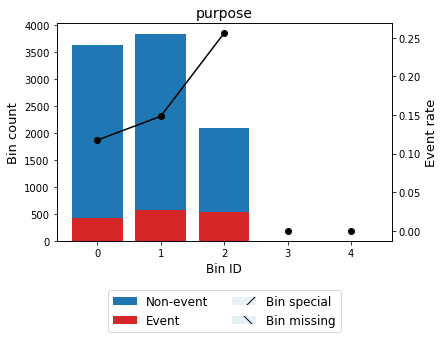

In [51]:
binning_table.plot(metric="event_rate")

In [43]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", min_bin_size = 0.1)
x = df['revol_bal'].values
y = df['not_fully_paid'].values
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=0.1, min_event_rate_diff=0,
               min_n_bins=None, min_prebin_size=0.05, mip_solver='bop',
               monotonic_trend='auto', name='purpose', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=100,
               user_splits=None, user_splits_fixed=None, ...)

In [44]:
optb.splits

array([ 2391.5,  7588. , 10290.5, 15613. , 22973.5])

In [46]:

binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2391.50)",1985,0.207246,1662,323,0.162720,-0.0196995,0.000081,0.000010
1,"[2391.50, 7588.00)",2439,0.254646,2055,384,0.157442,0.0195644,0.000097,0.000012
2,"[7588.00, 10290.50)",968,0.101065,849,119,0.122934,0.307112,0.008570,0.001067
3,"[10290.50, 15613.00)",1321,0.137920,1123,198,0.149886,0.0776677,0.000810,0.000101
4,"[15613.00, 22973.50)",1074,0.112132,905,169,0.157356,0.020212,0.000045,0.000006
5,"[22973.50, inf)",1791,0.186991,1451,340,0.189838,-0.206762,0.008565,0.001069
6,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,9578,1.000000,8045,1533,0.160054,,0.018169,0.002265


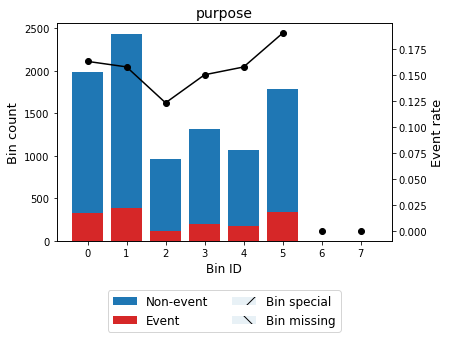

In [47]:
binning_table.plot(metric="event_rate")

With this splits we could transform each bin to have a WOE relevant to the categories. We will do that for the pipeline of the process. This process showcases how to find WOE bins and check for business understanding behind the binning process we will do right away.